# **Digital Image representation**



## **Grayscale image**

A 2D grayscale image is an matrix $ I \in \mathbb{R}^{H \times W}$. Where $H$ and $W$ denote the image height and width in pixels, respectively.

Each entries $I_{ij}$ is a scalar represent the **intensity**(brightness) of the pixel located at the $i-th$ row and $j-th$ columns.

$$
I_{ij} \in \{0,1, \dots, 255\}
$$


**Example**

Suppose we haven $3 \times 3$ image with **9 pixels**

$$
I^{ 3 \times 3}
=
\begin{bmatrix}
0 & 127 & 255 \\
50 & 180 & 220 \\
10 & 60 & 90
\end{bmatrix}
$$


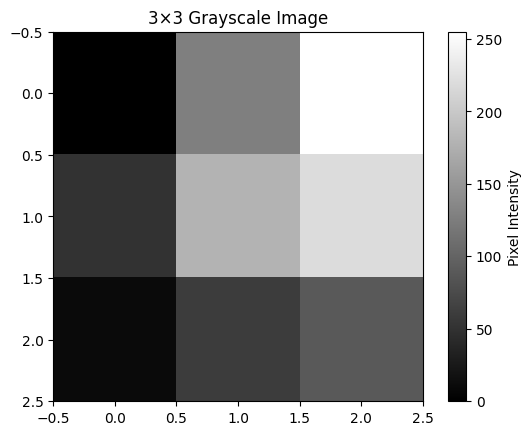

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gray_img = np.array([
    [0,   127, 255],
    [50,  180, 220],
    [10,   60,  90]
], dtype=np.uint8)

plt.imshow(gray_img, cmap='gray', vmin=0, vmax=255)
plt.title("3×3 Grayscale Image")
plt.colorbar(label="Pixel Intensity")
plt.show()


## **Colored Image**

A **color image** is a **3D matrix (tensor)** that stores three separate **grayscale layers**,  
one for each color channel — **Red (R)**, **Green (G)**, and **Blue (B)**.

Formally:

$$
I \in \mathbb{R}^{H \times W \times 3}
$$

where:

* $H$: image height (rows)  
* $W$: image width (columns)  
* The 3rd dimension (size $=3$) corresponds to the three color channels.

Where each entries (pixel) $\mathbf{v}_{ij}$ is a **3D vector**  

$$
\mathbf{v}_{ij} =
\begin{bmatrix}
R_{ij}\\G_{ij}\\B_{ij}
\end{bmatrix}
\in \mathbb{R}^3
$$

where each component gives that pixel’s red, green, and blue intensity:

$$
R_{ij},\, G_{ij},\, B_{ij} \in \{0,1,\dots,255\}.
$$

**Example** — $2\times2$ RGB image:

$$
I^{2\times2\times3} =
\begin{bmatrix}
[(255,0,0)] & [(0,255,0)] \\
[(0,0,255)] & [(255,255,0)]
\end{bmatrix}
$$

Each entry like $[255, 0, 0]$ is the RGB vector for one pixel (pure red).


Shape: (2, 2, 3)


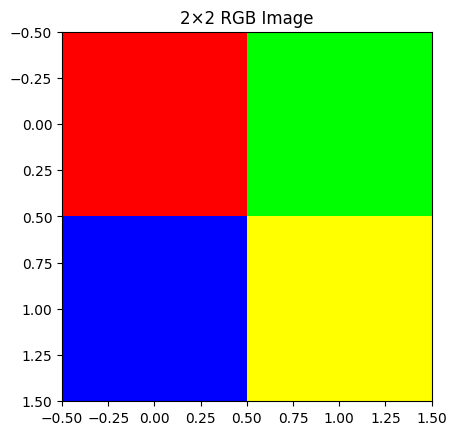

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rgb_img = np.array([
    [[255,   0,   0], [0, 255,   0]],   # row 1: red, green
    [[0,     0, 255], [255, 255, 0]]    # row 2: blue, yellow
], dtype=np.uint8)

print("Shape:", rgb_img.shape)
plt.imshow(rgb_img)
plt.title("2×2 RGB Image")
plt.show()


# Greyscale to RGB color image conversion


We are trying to create a function $f$ that maps the 2D grayscale matrix to a 3D tensor.

$$
f(I_{\text{gray}}) \rightarrow I_{\text{color}} \quad
f(\mathbb{R}^{H \times W}) \rightarrow \mathbb{R}^{H \times W \times 3}
$$


### **Linear mapping from an RGB tensor to a grayscale image**

Given a grayscale matrix $Y \in  \mathbb{R}^{H \times W}$ with entries $y_{ij} \in \mathbb{R}$. We want to convert it to $ V \in \mathbb{R}^{H \times W \times 3}$ **3D** RGB tensor with entries $\mathbf{v}_{ij} \in \mathbb{R}^3$.


We can express each entries/pixels of $V$ as a **linear combination** of the corresponding entries 2D grayscal matrix $Y$

$$
y_{ij} \; = \; \mathbf{w}^{\top}\mathbf{v}_{ij}
\; = \;
\begin{bmatrix}
w_R & w_G & w_B
\end{bmatrix}
\begin{bmatrix}
R_{ij} \\ G_{ij} \\ B_{ij}
\end{bmatrix}
= w_R R_{ij} + w_G G_{ij} + w_B B_{ij}
$$

This is the mapping **RGB Color -> Grayscale**. We want the reverse, that is we want to solve $\mathbf{v}$ given $y = \mathbf{w}^{\top} \mathbf{v}$.



## **Solving for $\mathbf{v}$**

While the mapping is helpful but we want to solve $\mathbf{v}$, the expression $y = \mathbf{w}^{\top} \mathbf{v}$ has infinite many solutions. And thus tell us nothing useful. So we need to find a more useful $\mathbf{u}$ decomposition that gives more constraint:

Any vector $\mathbf{v}$ and a nonzero vector $\mathbf{w}$ we can rewrite $\mathbf{v}$ as

$$
\begin{aligned}
\mathbf{v}
\; &= \;
\operatorname{proj}_{\mathbf{w}}(\mathbf{v}) + \left(\mathbf{v} - \operatorname{proj}_{\mathbf{w}}(\mathbf{v}) \right) \\[5pt]
&= \;
\frac{\mathbf{v}\cdot\mathbf{w}}{\mathbf{w}\cdot\mathbf{w}}\,\mathbf{w}
+
\Big(\mathbf{v} - \frac{\mathbf{v}\cdot\mathbf{w}}{\mathbf{w}\cdot\mathbf{w}}\,\mathbf{w} \Big) \\[5pt]
&= \;
\underbrace{\frac{\mathbf{w}^\top \mathbf{v}}{\mathbf{w}^\top \mathbf{w}}\,\mathbf{w}}_{\text{parallel to $\mathbf{w}$}}
+ \underbrace{\Big(\mathbf{v} - \frac{\mathbf{w}^\top \mathbf{v}}{\mathbf{w}^\top \mathbf{w}}\,\mathbf{w} \Big)}_{\text{orthogonal to $\mathbf{w}$}}
\\[5pt]
&= \;
\underbrace{\frac{y}{\mathbf{w}^\top \mathbf{w}}\,\mathbf{w}}_{\text{brightness part of $\mathbf{v}$}}
+
\underbrace{\Big(\mathbf{v} - \frac{y}{\mathbf{w}^\top \mathbf{w}}\,\mathbf{w}\Big)}_{\text{the missing part of $\mathbf{v}$}}
&& \text{ as y = $\mathbf{w}^{\top} \mathbf{v}$}\\[5pt]
&=
\underbrace{y}_{\text{luminosity} \\ \text{scalar} \\ y \in \{0,..,255\} }
\underbrace{\left({\frac{1}{\mathbf{w}^\top \mathbf{w}}}\,\mathbf{w} \right)}_{\text{3D vector}}
+
\underbrace{\left(\mathbf{v} - y \frac{1}{\mathbf{w}^\top \mathbf{w}}\,\mathbf{w} \right)}_{\text{the missing part of $\mathbf{v}$ } \\ \text{without  luminosity (chroma)} } \\[5pt]
&= \mathbf{v}_{\parallel} + \mathbf{v}_{\perp}
\end{aligned}
$$

This decomposition of show us that $\operatorname{proj}_{\mathbf{w}}(\mathbf{v})$ contains the brigthness or luminosity part of the RGB vector $\mathbf{v}$ since $ y \in Y$ is a scalar entries of matrix $Y$ representing brightness/luminosity.



This also tell us another important constraint and confirm mathematically what we know $\mathbf{w}$ is orthogonal to $\mathbf{v}_{\perp}$

$$
\mathbf{w}^{\top} \left(\mathbf{v} - \operatorname{proj}_{\mathbf{w}}(\mathbf{v}) \right) = \mathbf{w}^{\top} \mathbf{v}_{\perp} = 0
$$


We can confirm that $\operatorname{proj}_{\mathbf{w}}(\mathbf{v})$ is the only responsible brightness component of $\mathbf{v}$ by substutitng the above decomposition into $y = \mathbf{w}^{\top} \mathbf{v}$

$$
\begin{aligned}
y &= \mathbf{w}^{\top} \mathbf{v} \\[5pt]
&= \mathbf{w}^{\top} \Big( \operatorname{proj}_{\mathbf{w}}(\mathbf{v}) + \left(\mathbf{v} - \operatorname{proj}_{\mathbf{w}}(\mathbf{v}) \right) \Big) \\[5pt]
&= \mathbf{w}^{\top} \left(\mathbf{v}_{\parallel} + \mathbf{v}_{\perp} \right) \\[5pt]
&= \mathbf{w}^{\top} \mathbf{v}_{\parallel} + \mathbf{w}^{\top} \mathbf{v}_{\perp} \\[5pt]
&=  \mathbf{w}^{\top} \mathbf{v}_{\parallel}
 + 0  &&\text{as $\left(\mathbf{v} - \operatorname{proj}_{\mathbf{w}}(\mathbf{v}) \right) = \mathbf{v}_{\perp}$ is orhtogonal to $\mathbf{w}$ }\\[5pt]
&= \mathbf{w}^{\top} \mathbf{v}_{\parallel} && \text{also show that $\operatorname{proj}_{\mathbf{w}}(\mathbf{v}) = \mathbf{v}_{\parallel}$  only contains luminosity part}\\[5pt]
&= \mathbf{w}^{\top} \frac{\mathbf{w^{\top} \mathbf{v}}}{\mathbf{w}^\top \mathbf{w}}\,\mathbf{w}\\[5pt]
&= \mathbf{w}^{\top}\mathbf{v} \\[5pt]
&= y
\end{aligned}
$$


The implication of this is that say we have some RGB vector $\mathbf{v}$ with grayscale value $y = \mathbf{w}^{\top}\mathbf{v}$.

Now, suppose we add a vector $\mathbf{c}$ (for "chroma" or color) that is perpendicular to $\mathbf{w}$, meaning $\mathbf{w}^{\top}\mathbf{c} = 0$.
And we add $\mathbf{c}$ to an arbitartry rgb vector and we define it as $\mathbf{v}_{\text{new}}$.

$$\mathbf{v}_{\text{new}} = \mathbf{v} + \mathbf{c}$$



notice that
$$
y_{\text{new}} = \mathbf{w}^{\top}(\mathbf{v} + \mathbf{c}) = \mathbf{w}^{\top}\mathbf{v} + \mathbf{w}^{\top}\mathbf{c} = y + 0 = y
$$

so adding any vector perpendicular to $\mathbf{w}$ doesn't change the grayscale value.


### **Understanding the Constraint Geometry**

We have the constraint: $\mathbf{w}^{\top}\mathbf{v}_{\perp} = 0$, where
$$
\mathbf{w} =
\begin{bmatrix}
w_R \\ w_G \\ w_B
\end{bmatrix},
\quad
\mathbf{v}_{\perp} =
\begin{bmatrix}
v_R \\ v_G \\ v_B
\end{bmatrix}.
$$

Expanding the dot product gives:
$$
w_R v_R + w_G v_G + w_B v_B = 0.
$$

Solving for one variable (say $v_B$):
$$
v_B = -\frac{w_R v_R + w_G v_G}{w_B}.
$$

Hence we can write:
$$
\mathbf{v}_{\perp} =
\begin{bmatrix}
v_R \\
v_G \\
-\dfrac{w_R v_R + w_G v_G}{w_B}
\end{bmatrix} =
v_R
\begin{bmatrix}
1 \\
0 \\
-\dfrac{w_R}{w_B}
\end{bmatrix}
+
v_G
\begin{bmatrix}
0 \\
1 \\
-\dfrac{w_G}{w_B}
\end{bmatrix}.
$$


Here, $v_R$ and $v_G$ are **free parameters** that can take any real values, while $v_B$ is determined by the orthogonality constraint.
Thus, $\mathbf{v}_{\perp}$ lies in a **2-dimensional subspace** of $\mathbb{R}^3$, and can be expressed as a **linear combination of two independent basis vectors**.

Choose any two independent vectors

$$
\mathbf{u}_1 =
\begin{bmatrix}
u_{1R} \\ u_{1G} \\ u_{1B}
\end{bmatrix},
\quad
\mathbf{u}_2 =
\begin{bmatrix}
u_{2R} \\ u_{2G} \\ u_{2B}
\end{bmatrix} \in \mathbb{R}^3
\quad \text{such that} \quad
\mathbf{w}^\top \mathbf{u}_1 = \mathbf{w}^\top \mathbf{u}_2 = 0,
$$

and represent every possible chroma vector $\mathbf{v}_{\perp}$ as

$$
\mathbf{v}_{\perp} = \alpha\,\mathbf{u}_1 + \beta\,\mathbf{u}_2, \qquad \alpha, \beta \in \mathbb{R}.
$$

The set of all such vectors orthogonal to $\mathbf{w}$ (for one pixel or $\mathbf{v}_{ij}$ )is

$$
\mathbf{w}^\perp = \{ \mathbf{v}_{\perp} \in \mathbb{R}^3 : \mathbf{w}^\top \mathbf{v}_{\perp} = 0 \}
$$

which forms a **plane through the origin  a 2-dimensional subspace** of $\mathbb{R}^3$.

$$
\dim(\mathbf{w}^\perp) = 2
$$

Then for the entire image
$$
\dim((\mathbf{w}^\perp)^{H\times W}) = 2 \times (H \times W).
$$


Therefore we can represent RGB vector $\mathbf{v}$ as

$$
\mathbf{v} = \frac{y_{ij}}{\mathbf{w}^{\top}\mathbf{w}}\mathbf{w} + \underbrace{\alpha\,\mathbf{u}_1 + \beta\,\mathbf{u}_2}_{\mathbf{v}_{\perp}}
$$

where $\alpha, \beta \in \mathbb{R}$ are free parameters. Notice it can take any real values, which mean $\mathbf{v}$ can go outside of the RGB range
$0 \le R, G, B \le 255$. Thus we will use lab space



# **Using Supervised Learning Regression**

## **Training phasef**

Given a RGB colored image 3D tensor $\mathbf V \in \mathbb{R}^{H\times W\times 3},$


$$
\mathbf V =
\begin{bmatrix}
\mathbf v_{11} & \mathbf v_{12} & \dots & \mathbf v_{1W}\\[3pt]
\mathbf v_{21} & \mathbf v_{22} & \dots & \mathbf v_{2W}\\[3pt]
\vdots & \vdots & \ddots & \vdots\\[3pt]
\mathbf v_{H1} & \mathbf v_{H2} & \dots & \mathbf v_{HW}
\end{bmatrix},
\quad
\mathbf v_{ij} =
\begin{bmatrix}
R_{ij}\\[3pt]G_{ij}\\[3pt]B_{ij}
\end{bmatrix}.
$$

We extract the whole grayscale $Y \in \mathbb{R}^{H\times W}$ matrix at once

$$
Y =
\begin{bmatrix}
y_{11} & y_{12} & \dots & y_{1W}\\
y_{21} & y_{22} & \dots & y_{2W}\\
\vdots & \vdots & \ddots & \vdots\\
y_{H1} & y_{H2} & \dots & y_{HW}
\end{bmatrix}
\in \mathbb{R}^{H\times W}.
$$

using definiton

$$
Y=[y_{ij}]=[\mathbf w^\top\mathbf v_{ij}],
$$

Then we select $m$ filters (or kernels) of our choice,
$$
K^{(1)}, K^{(2)}, \dots, K^{(m)},
$$

where each $K^{(k)}$ is a matrix of size $p \times q$. And $K^{(k)}_{pq}$ is the  **entry** of $K^{(k)}$

$$
K^{(k)} =
\begin{bmatrix}
K^{(k)}_{11} & K^{(k)}_{12} & \dots & K^{(k)}_{1q} \\
 K^{(k)}_{21} & K^{(k)}_{22} & \dots & K^{(k)}_{2q} \\ \vdots & \vdots & \ddots & \vdots \\
 K^{(k)}_{p1} & K^{(k)}_{p2} & \dots & K^{(k)}_{pq}
\end{bmatrix}  
\qquad
\color{grey}
{
\text{ex: }
K^{(k)} =
\begin{bmatrix}
0 & -1 & 0 \\[3pt]
-1 & 4 & -1 \\[3pt]
0 & -1 & 0
\end{bmatrix}.
}
$$

For every local submatrix $Y_{ij}$ of the luminance matrix $Y$

we compute its **feature vector** $\mathbf z_{ij}\in\mathbb{R}^m$ by taking the inner product of each filter with that patch:

$$
\mathbf z_{ij} =
\begin{bmatrix}
z_{1} =\langle K^{(1)}, Y_{ij} \rangle_F \\[4pt]
z_{2} = \langle K^{(2)}, Y_{ij} \rangle_F \\[4pt]
\vdots \\[4pt]
z_{m} = \langle K^{(m)}, Y_{ij} \rangle_F
\end{bmatrix}
$$

> where

>$$
\langle K^{(k)}, Y_{ij}\rangle_F
\;=\;
\sum_{p,q} K^{(k)}_{pq}\,Y_{pq}
\; = \;
{\scriptsize
\sum_{\text{all entries}} \left(
\begin{bmatrix}
K^{(k)}_{11}Y_{11}  & \cdots & K^{(k)}_{1q}Y_{1q}\\
K^{(k)}_{21}Y_{21}  & \cdots & K^{(k)}_{2q}Y_{2q}\\
\vdots & \ddots & \vdots \\
K^{(k)}_{p1}Y_{p1}  & \cdots & K^{(k)}_{pq}Y_{pq}
\end{bmatrix}
\right)
}
\; = \;
K^{(k)}_{11}Y_{i1} + K^{(k)}_{12}Y_{i2} + \dots + K^{(k)}_{pq}Y_{iq}
$$

Each component $z_k(i,j)=\langle K^{(k)},Y_{ij}\rangle$ tell us  **how strongly** the local patch $Y_{ij}$ matches the luminance pattern encoded by the $k$-th filter $K^{(k)}$.

Then for every submatrices $\mathbf{v}_{ij}$ we computed the predicted RGB vector

$$
\widehat{\mathbf v}_{ij}
\; = \;
\underbrace{\frac{y_{ij}}{\mathbf w^\top\mathbf w}\mathbf w}_{\mathbf{v}_{\parallel}}
\; + \;
\underbrace{\left[ (\mathbf a^\top \mathbf z_{ij})\,\mathbf u_1
+ (\mathbf b^\top \mathbf z_{ij})\,\mathbf u_2 \right]}_{\mathbf{v}_{\perp}}
$$

>> with unknown parameter vector $\mathbf{a}, \; \mathbf{b} \in \mathbb{R}^{m}$ that we want to solve for that give us $\widehat{\mathbf v}_{ij} \approx \mathbf{v}_{ij}$. And  $\mathbf{u}_1, \; \mathbf{u}_2$ satisfy the constraint  $\mathbf{w}^{\top} \mathbf{u}_1 =  0$ and $\mathbf{w}^{\top} \mathbf{u}_2 = 0$. (orthonormal basis for the chroma plane orthogonal to $\mathbf{w}$).

We can define the predicted chroma scalars as:

$$
\alpha_{ij} =\mathbf a^\top\mathbf z_{ij},\qquad
\beta_{ij} =\mathbf b^\top\mathbf z_{ij}. \\
\mathbf v_\perp\; = \; \alpha \,\mathbf u_1 + \beta \,\mathbf u_2  
$$

Then $\alpha^{\text{true}}, \beta^{\text{true}}$  are

$$
\alpha^{\text{true}}_{ij}
= \mathbf u_1^\top \mathbf v_{ij}
=\mathbf u_1^\top\Big(\mathbf v_{ij}-\tfrac{y_{ij}}{\mathbf w^\top\mathbf w}\mathbf w\Big) \\
\beta^{\text{true}}_{ij}
=  \mathbf u_2^\top \mathbf v_{ij}
= \mathbf u_2^\top\Big(\mathbf v_{ij}-\tfrac{y_{ij}}{\mathbf w^\top\mathbf w}\mathbf w\Big).
$$

<details>
  <summary><b>derivation</b></summary>

The **true** chroma coefficients, $\alpha^{\text{true}}, \beta^{\text{true}}$ can be find by solving for $\alpha$ and $\beta$.
Say to solve for $\alpha$  we need to take the dot product of $\mathbf u_1$ of the whole expression

$$
\begin{aligned}
\mathbf v_\perp &=  \alpha \,\mathbf u_1 + \beta \,\mathbf u_2  \\[4pt]
(\mathbf u_1^\top)  \mathbf v_\perp &= \alpha (\mathbf u_1^\top \mathbf u_1) + \beta (\mathbf u_1^\top \mathbf u_2) \\[4pt]
\mathbf u_1^\top  \mathbf v_\perp  &= \alpha (\mathbf u_1^\top \mathbf u_1) + \beta \cdot 0 && \text{ $\mathbf{u_1}, \mathbf{u_2}$ are orthogonal} \\[4pt]
\alpha &= \frac{\mathbf u_1^\top  \mathbf v_\perp}{(\mathbf u_1^\top \mathbf u_1) }
&& \text{$(\mathbf u_1^\top \mathbf u_1)$, $\mathbf{u_1^\top} > 0$ are scalar} \\[4pt]
\alpha &= \frac{\mathbf u_1^\top}{\|\mathbf u_1\|^2 }  \mathbf{v}_\perp
&& (\mathbf{u}_1^{\top} \mathbf{u}_1 = \|\mathbf u_1\|^2 )
 \\[4pt]
\alpha &= \mathbf{u}_1^{\top} \mathbf{v}_\perp
&& \text{if $\mathbf{u}_2$ is normalized $\implies  \|\mathbf u_1\|^2 = 1$ } \\[4pt]
\implies \beta  &= \mathbf{u}_2^{\top} \mathbf{v}_\perp
\end{aligned}
$$

Since

$$
\mathbf{v}_{\perp}
\; = \;
\left(\mathbf{v} - \operatorname{proj}_{\mathbf{w}}(\mathbf{v}) \right)
\; = \;
\Big(\mathbf{v} - \frac{y}{\mathbf{w}^\top \mathbf{w}} \mathbf{w} \Big)
$$

Thus  $\alpha^{\text{true}}, \beta^{\text{true}}$  are

$$
\alpha^{\text{true}}_{ij}
= \mathbf u_1^\top \mathbf v_{ij}
=\mathbf u_1^\top\Big(\mathbf v_{ij}-\tfrac{y_{ij}}{\mathbf w^\top\mathbf w}\mathbf w\Big) \\
\beta^{\text{true}}_{ij}
=  \mathbf u_2^\top \mathbf v_{ij}
= \mathbf u_2^\top\Big(\mathbf v_{ij}-\tfrac{y_{ij}}{\mathbf w^\top\mathbf w}\mathbf w\Big).
$$
</details>


Then the for a single reconstruction $\mathbf{v}_{ij}$ error

$$
e_{ij} = \big\| \mathbf v_{ij} - \widehat{\mathbf v}_{ij} \big\|^2.
$$

Let the total number of valid submatrices be $N=(H-p+1)(W-q+1)$

$$
Z=\begin{bmatrix}\mathbf z_1^\top\\ \vdots\\ \mathbf z_N^\top\end{bmatrix}\in\mathbb R^{N\times m},\quad
\boldsymbol\alpha^{\text{true}}=\begin{bmatrix}\alpha^{\text{true}}_1\\ \vdots\\ \alpha^{\text{true}}_N\end{bmatrix},\quad
\boldsymbol\beta^{\text{true}}=\begin{bmatrix}\beta^{\text{true}}_1\\ \vdots\\ \beta^{\text{true}}_N\end{bmatrix}.
$$

Then the total reconstruction error is:

$$
\begin{aligned}
E(\mathbf a,\mathbf b)
&=
\sum_{i,j}
\|\mathbf v_{ij}-\widehat{\mathbf v}_{ij}\|^2 \\[4pt]
&=
\|\alpha^{\text{true}} - Z\mathbf a\|^2
+\|\beta^{\text{true}} - Z\mathbf b\|^2.
\end{aligned}
$$

Thus we want to find the vector $\mathbf{a}, \mathbf{b}$ that minimize the total error $E(\mathbf a,\mathbf b)$





## **In Lab-space**


In Lab space, we define
$$
\mathbf v_{ij}^{(Lab)} =
f_{\text{RGB}\to\text{Lab}}(\mathbf v_{ij})
=
\begin{bmatrix}
L_{ij}\\[3pt]
a_{ij}\\[3pt]
b_{ij}
\end{bmatrix}.
$$

Then
$$
\mathbf w =
\begin{bmatrix}1\\0\\0\end{bmatrix}
\quad (\text{for } L),
\qquad
\mathbf u_1 =
\begin{bmatrix}0\\1\\0\end{bmatrix},
\quad
\mathbf u_2 =
\begin{bmatrix}0\\0\\1\end{bmatrix}.
$$

That gives
$$
y_{ij} = \mathbf w^\top \mathbf v_{ij}^{(Lab)} = L_{ij},
\qquad
\frac{y_{ij}}{\mathbf w^\top \mathbf w}\mathbf w
=
\begin{bmatrix}
L_{ij}\\0\\0
\end{bmatrix}.
$$

Thus the predictor becomes
$$
\widehat{\mathbf v}_{ij}^{(Lab)} =
\begin{bmatrix}
L_{ij}\\
\mathbf a^\top \mathbf z_{ij}\\
\mathbf b^\top \mathbf z_{ij}
\end{bmatrix}.
$$

Subtracting,
$$
\mathbf v_{ij}^{(Lab)} - \widehat{\mathbf v}_{ij}^{(Lab)}
=
\begin{bmatrix}
0\\
a_{ij} - \mathbf a^\top \mathbf z_{ij}\\
b_{ij} - \mathbf b^\top \mathbf z_{ij}
\end{bmatrix}
=
(a_{ij}-\mathbf a^\top\mathbf z_{ij})\,\mathbf u_1
+
(b_{ij}-\mathbf b^\top\mathbf z_{ij})\,\mathbf u_2.
$$

Then
$$
\big\|
\mathbf v_{ij}^{(Lab)} - \widehat{\mathbf v}_{ij}^{(Lab)}
\big\|^2
=
(a_{ij}-\mathbf a^\top\mathbf z_{ij})^2
+
(b_{ij}-\mathbf b^\top\mathbf z_{ij})^2.
$$

Hence the goal is

$$
\min_{\mathbf a,\mathbf b}\ E(\mathbf a,\mathbf b)
=\min_{\mathbf a,\mathbf b}\big(\|a^{true}-Z\mathbf a\|^2+\|b^{true}-Z\mathbf b\|^2\big).
$$

# **Converting to CNN**
Our goal is to make our prediction ($\widehat{\mathbf{v}}_{ij}$) match the truth ($\mathbf{v}_{ij}$).

Let's look at the problem with SLR, we measure the error using **MSE**


$$
e_{ij} = e_{\alpha} + e_{\beta} = (\alpha^{\text{true}}_{ij} - \alpha_{ij})^2 + (\beta^{\text{true}}_{ij} - \beta_{ij})^2
$$

We obviously want to make $e_{ij}$  $\approx 0$ as much as possible, but we can't solve this directly. But we can make changes to $\mathbf{a,b}$ and $K^{(k)}$ to make $e_{ij}$ smaller.

We want to see how changes to parameters affect the changes of $e_{ij}$, this is where **derivative**, in this case **(partial derivative)** comes in.

Since  
$$
\frac{\partial}{\partial e_{ij}} = \frac{\partial}{\partial e_{\alpha}} + \frac{\partial}{\partial e_{\beta}}
$$

We can start looking at $\frac{\partial}{\partial e_{\alpha}}$ first.


Our prediction parameter $\alpha_{ij}$ is defined as

$$
\alpha_{ij} = a_1 z_1 + a_2 z_2 + \dots + \color{grey}{a_k z_k} + \dots + a_m z_m
$$

While the actual

$$
\alpha^{\text{true}}_{ij}
= \mathbf u_1^\top \mathbf v_{ij}
=\mathbf u_1^\top\Big(\mathbf v_{ij}-\tfrac{y_{ij}}{\mathbf w^\top\mathbf w}\mathbf w\Big)
$$

If we want to see how changes to $\color{grey}{a_k}$ affect $e_{ij}$ we can use the chain rule to find $\frac{\partial e_{\alpha}}{\partial a_k}$

>> **Chain rule**:
>> $$
\frac{d}{dx}\!\left[ {\color{blue}{f}} \color{blue}{ ( } \color{red}{g(x)} \color{blue}{ )}   \right]
= {\color{blue}{f'}}{\color{blue}{(}}\color{red}{g(x)}{\color{blue}{)}}
\, \cdot \color{red}{g'(x)}
\color{grey} {\; = \; \frac{df}{dg} \cdot \frac{dg}{dx}}
$$

Then

$$
\frac{\partial e_{\alpha}}{\partial a_k}
\; = \;
\underbrace{
{\color{blue}{2}}\,
{\color{blue}{(}}\color{red}{\alpha^{\text{true}}_{ij} - \alpha_{ij}}{\color{blue}{)}}^{\color{blue}{\,2-1}}
}_{\text{First part}}
\cdot
\underbrace{
\color{red}{\frac{\partial}{\partial a_k}\left[ \alpha^{\text{true}}_{ij} - \alpha_{ij} \right]}
}_{\text{Second part}}
\; = \;
{\color{blue}{2}}\,
{\color{blue}{(}}\color{red}{\alpha^{\text{true}}_{ij} - \alpha_{ij}}{\color{blue}{)}}
\cdot
\color{red}{(-z_k)}
$$

<details>
  <summary><b>Expanding $\text{Second part}$</b></summary>
$$
\begin{aligned}
\color{red}{\frac{\partial}{\partial a_k} \left[ \alpha^{\text{true}}_{ij} - \alpha_{ij} \right]}
\; &= \;
\frac{\partial}{\partial a_k} \alpha^{\text{true}}_{ij}  -  
\frac{\partial}{\partial a_k} \alpha_{ij}
\\[4pt]
\; &= \;
\frac{\partial}{\partial a_k} u_1^\top \mathbf v_{ij}
-
\frac{\partial}{\partial a_k} \left[  a_1 z_1 + a_2 z_2 + \dots + a_k z_k + \dots + a_m z_m \right]
\\[4pt]
\; &= \;
0
-
\frac{\partial}{\partial a_k} \left[  a_1 z_1 + a_2 z_2 + \dots + a_k z_k + \dots + a_m z_m \right]
 \\[5pt]
\; &= \;
0
-
\frac{\partial}{\partial a_k} \left[ a_k z_k \right]
\\[4pt]
&= \color{red}{-z_k}
\end{aligned}
$$

</details>

$e_{\alpha}$ depends on $\alpha_{ij}$.
And our  prediction $\alpha_{ij}$ depends on $\mathbf{z}_{ij} $ (say specially $z_k$).


$$
{\small
\mathbf z_{ij} =
\begin{bmatrix}
z_{1} =\langle K^{(1)}, Y_{ij} \rangle_F \\[4pt]
\vdots \\[4pt]
z_{k} = \langle K^{(k)}, Y_{ij} \rangle_F \\[4pt]
\vdots \\[4pt]
z_{m} = \langle K^{(m)}, Y_{ij} \rangle_F
\end{bmatrix}
\qquad
z_k = \langle K^{(k)}, Y_{ij} \rangle_F =  \sum K^{(k)}_{pq} \cdot Y_{ij}(p,q)
},
$$


And our $z_k$ depends on the kernal entry $K^{(k)}_{pq}$ (since $Y_{ij}$ is given).

Thus then we want to find $\frac{\partial e_{\alpha}}{\partial K^{(k)}_{pq}}$.And we know the link is $K^{(k)}_{pq} \rightarrow z_k \rightarrow \alpha_{ij} \rightarrow e_{\alpha}$

So

$$
\begin{aligned}
\frac{\partial e_{\alpha}}{\partial K^{(k)}_{pq}}
&=
\frac{\partial e_{\alpha}}{\partial \alpha_{ij}}
\cdot
\frac{\partial \alpha_{ij}}{\partial z_k}
\cdot
\frac{\partial z_k}{\partial K^{(k)}_{pq}} \\[4pt]
&=
\left( -2(\alpha^{\text{true}}_{ij} - \alpha_{ij}) \right)
\cdot
\left( a_k \right)
\cdot
\frac{\partial z_k}{\partial K^{(k)}_{pq}} \\[4pt]
&=
\left( -2(\alpha^{\text{true}}_{ij} - \alpha_{ij}) \right)\left( a_k \right)
\cdot
\frac{\partial }{\partial K^{(k)}_{pq}}
\big[K^{(k)}_{11} \cdot Y_{ij}(1,1)) + \dots +  \underbrace{(K^{(k)}_{pq} \cdot Y_{ij}(p,q))}_{\text{our term}} + \dots
\big] \\[4pt]
&=
\left( -2(\alpha^{\text{true}}_{ij} - \alpha_{ij}) \right)\left( a_k \right)
\cdot
\frac{\partial}{\partial K^{(k)}_{pq}} \left[ K^{(k)}_{pq} \cdot Y_{ij}(p,q) \right]\\[4pt]
&=
\left( -2(\alpha^{\text{true}}_{ij} - \alpha_{ij}) \right)\left( a_k \right)
\cdot
\left( Y_{ij}(p,q) \right)
\end{aligned}
$$


Thus

$$
\frac{\partial e_{\alpha}}{\partial K^{(k)}_{pq}}
=
\left( -2(\alpha^{\text{true}}_{ij} - \alpha_{ij}) \right)
a_k \;
Y_{ij}(p,q)
$$

This mean for $\frac{\partial e_{\alpha}}{\partial K^{(k)}_{pq}}$ The link is similar $K^{(k)}_{pq} \rightarrow z_k \rightarrow \beta_{ij} \rightarrow e_{\beta}$

$$
\frac{\partial e_{\beta}}{\partial K^{(k)}_{pq}}
=
\left( -2(\beta^{\text{true}}_{ij} - \beta_{ij}) \right)
b_k \;
Y_{ij}(p,q)
$$

THen for the total error $e_{ij}$ (**Entry wise form: (Scalar)**)

$$
\begin{aligned}
\frac{\partial e_{ij}}{\partial K^{(k)}_{pq}}
&= \frac{\partial e_{\alpha}}{\partial K^{(k)}_{pq}} + \frac{\partial e_{\beta}}{\partial K^{(k)}_{pq}}
\frac{\partial e_{ij}}{\partial K^{(k)}_{pq}} \\[4pt]
&= \;
-2\Big[
(\alpha^{\text{true}}_{ij} - \alpha_{ij})\; a_k
+
(\beta^{\text{true}}_{ij} - \beta_{ij})\; b_k
\Big]
Y_{ij}(p,q)
\end{aligned}
$$

Then for the entire **Kernals** matrix $\frac{\partial e_{ij}}{\partial K^{(k)}}$

$$
\begin{aligned}
\frac{\partial e_{ij}}{\partial K^{(k)}} &= -2\Big[(\alpha^{\text{true}}_{ij}-\alpha_{ij})a_k + (\beta^{\text{true}}_{ij}-\beta_{ij})b_k\Big]\;Y_{ij} \\[5pt]
&=
{\scriptsize
\begin{bmatrix}
\frac{\partial e_{ij}}{\partial K^{(k)}_{11}}
& \dots
& \frac{\partial e_{ij}}{\partial K^{(k)}_{1q}}
\\[4pt]
\vdots
& \ddots
& \vdots
\\[4pt]
\frac{\partial e_{ij}}{\partial K^{(k)}_{p1}}
& \dots
& \frac{\partial e_{ij}}{\partial K^{(k)}_{pq}}
\end{bmatrix}
}
\\[5pt]
&=
{\scriptsize
-2\Big[(\alpha^{\text{true}}_{ij}-\alpha_{ij})\,a_k
\;+\;
(\beta^{\text{true}}_{ij}-\beta_{ij})\,b_k\Big]\;
\begin{bmatrix}
Y_{ij}(1,1) & \dots & Y_{ij}(1,q)
\\[4pt]
\vdots & \ddots & \vdots
\\[4pt]
Y_{ij}(p,1) & \dots & Y_{ij}(p,q)
\end{bmatrix}
}
\end{aligned}
$$



### **For total error**

This is for one pixel error:
$$
\frac{\partial e_{ij}}{\partial K^{(k)}} \; = -2\Big[(\alpha^{\text{true}}_{ij}-\alpha_{ij})a_k + (\beta^{\text{true}}_{ij}-\beta_{ij})b_k\Big]\;Y_{ij}
$$

for the total error we want to find $\frac{\partial E}{\partial K^{(k)}}$


$$
\begin{aligned}
E
&=
\sum_{i,j}
\|\mathbf v_{ij}-\widehat{\mathbf v}_{ij}\|^2 \\[4pt]
&=
\|\alpha^{\text{true}} - Z\mathbf a\|^2
+\|\beta^{\text{true}} - Z\mathbf b\|^2.
\end{aligned}
$$

Then
$$
\frac{\partial E}{\partial K^{(k)}}
\; = \;
\sum_{i,j}
\frac{\partial e_{ij}}{\partial K^{(k)}}
\; = \;
-2
\sum_{i,j}
\Big[(\alpha^{\text{true}}_{ij}-\alpha_{ij})a_k
+ (\beta^{\text{true}}_{ij}-\beta_{ij})b_k\Big]\;Y_{ij}.
$$

Thus the update rule for **gradient descent** can be described as

$$
K^{(k)}_{\text{new}} = K^{(k)}_{\text{old}} - c \cdot \frac{\partial E}{\partial K^{(k)}}
$$

where $c$ is our learning rate

# **Activation Functions and non-linearity**

Our current model is a lienear predictor

$$
\alpha_{ij} = \mathbf a^\top \mathbf z_{ij}= a_1 z_1 + \dots + a_m z_m,
\qquad
\beta_{ij} = \mathbf b^\top \mathbf z_{ij} = b_1 z_1 + \dots + b_m z_m
$$

**weighted sum** of features. Each features $a_i z_i \in \alpha_{ij}$ always contribute, There's no if certain features $z_k > \text{certain value}$ the weight $a_k z_k$ should be $0$ (not contribute to $\alpha_{ij}$.

Thus it can't do

$$
z_k \ge 0 \implies a_k z_k = 0
$$

To fix this we can use the activation function **ReLU** activation function

$$
h_k = \text{ReLU}(z_k)
=
\begin{cases}
0, & z_k \le 0, \\[6pt]
z_k, & z_k > 0.
\end{cases}
$$


then prediction parameter $\alpha_{ij}$ (same logic applies to $\beta_{ij}$) becomes

$$
\alpha_{ij} = a_1 h_1 + a_2 h_2 + \cdots + a_m h_m.
$$

Which is

$$
\alpha_{ij}
=
a_1\begin{cases}
0, & z_1 \le 0 \\
z_1, & z_1 > 0
\end{cases}
+
a_2\begin{cases}
0, & z_2 \le 0 \\
z_2, & z_2 > 0
\end{cases} \cdots
$$

Each term contributes:

$$
a_k h_k = \begin{cases} 0, & z_k \le 0 \\ a_k z_k, & z_k > 0 \end{cases}
$$

So the whole $\alpha_{ij}$ becomes:

$$
\alpha_{ij} =
\begin{cases} a_1 z_1 + a_2 z_2 + \cdots + a_m z_m, & \text{if all } z_k > 0, \\
 a_2 z_2 + a_4 z_4, & \text{if  } z_2,z_4>0 \text{ and others}\le 0,\\
 a_3 z_3, & \text{if  } z_3 > 0, \\
 0, & \text{if all } z_k \le 0. \end{cases}
 $$


Now the network can **switch** between different linear rules depending on which features activate.


Next consider looking at $z_k$ error contribution to $e_{\alpha}$

The chain rule is $K^{(k)}_{pq} \rightarrow z_k \rightarrow \color{blue}{\text{ReLU}(z_k)} \color{black}{\rightarrow} \alpha_{ij} \rightarrow e_{\alpha}$

$$
\frac{\partial e_{\alpha}}{\partial K^{(k)}_{pq}} =
\frac{\partial e_{\alpha}}{\partial \alpha_{ij}}
\cdot
\frac{\partial \alpha_{ij}}{\partial \text{ReLU}(z_k)}
\cdot
\underbrace{
\color{blue}{\frac{\partial \text{ReLU}(z_k)}{\partial z_k}}
}_{\text{(New)}}
\cdot
\frac{\partial z_k}{\partial K^{(k)}_{pq}}
$$

where

$$
\frac{\partial \text{ReLU}(z_k)}{\partial z_k}
=
\begin{cases}
0, & z_k \le 0 \\[4pt]
1, & z_k > 0
\end{cases}
$$

If $h_k = \text{ReLU}(z_k) = 0$, then the gradient $\frac{\partial e_{\alpha}}{\partial K^{(k)}*{pq}}$ also becomes zero. This means that **no portion of the total error (e*{\alpha})** flows backward through the feature path $K^{(k)} \rightarrow z_k \rightarrow h_k$. In other words, feature $K^{(k)}$ contributed nothing to the prediction of $\alpha_{ij}$, so it should not receive any blame or adjustment during gradient descent. This is exactly the desired behavior: when a feature is **inactive** (its ReLU output is zero), the network treats it as unused for that input, and therefore its filter $K^{(k)}$ is **not updated**, allowing CNNs to specialize different filters for different patterns.





# **CNN Forward and Backpropagation**


Let the input grayscale patch be $Y \in \mathbb{R}^{p\times q}$.  
A convolutional neural network with $L$ layers produces a sequence of feature
vectors $(\mathbf{h}^{(0)},\mathbf{h}^{(1)},\dots,\mathbf{h}^{(L)})$,
starting from

$$
\mathbf{h}^{(0)} = Y.
$$

For each layer $\ell = 1,\dots,L$, let
$K^{(\ell,1)},\dots,K^{(\ell,m_\ell)}$ be the learned convolution kernels.
The pre-activation for feature $k$ in layer $\ell$ is

$$
z^{(\ell)}_k
= \langle K^{(\ell,k)},\,\mathbf{h}^{(\ell-1)}\rangle,
$$

and the activation is ReLU:

$$
h^{(\ell)}_k = \mathrm{ReLU}(z^{(\ell)}_k)
=
\begin{cases}
0, & z^{(\ell)}_k \le 0,\\[6pt]
z^{(\ell)}_k, & z^{(\ell)}_k > 0.
\end{cases}
$$

The layer-$\ell$ feature vector is

$$
\mathbf{h}^{(\ell)} =
\begin{bmatrix}
h^{(\ell)}_1\\[-2pt]
\vdots\\[-2pt]
h^{(\ell)}_{m_\ell}
\end{bmatrix}.
$$

After the final layer $L$, chroma coefficients are predicted by a linear
output layer with parameters $\mathbf{a},\mathbf{b}\in\mathbb{R}^{m_L}$:

$$
\alpha = \mathbf{a}^\top \mathbf{h}^{(L)},\qquad
\beta  = \mathbf{b}^\top \mathbf{h}^{(L)}.
$$

Given “true’’ chroma coefficients $\alpha^{\text{true}},\beta^{\text{true}}$,
we use the squared error

$$
e = (\alpha^{\text{true}} - \alpha)^2
  + (\beta^{\text{true}} - \beta)^2.
$$

Backpropagation computes gradients of $e$ with respect to all parameters.  
The derivatives at the output are

$$
\frac{\partial e}{\partial \alpha}
= -2(\alpha^{\text{true}} - \alpha),\qquad
\frac{\partial e}{\partial \beta}
= -2(\beta^{\text{true}} - \beta).
$$

The gradients of the output weights are

$$
\frac{\partial e}{\partial a_k}
= \frac{\partial e}{\partial \alpha}\,h^{(L)}_k,
\qquad
\frac{\partial e}{\partial b_k}
= \frac{\partial e}{\partial \beta}\,h^{(L)}_k,
$$

and the error with respect to the top-layer activations is

$$
\frac{\partial e}{\partial h^{(L)}_k}
=
\frac{\partial e}{\partial \alpha}\,a_k
+
\frac{\partial e}{\partial \beta}\,b_k.
$$

For each hidden layer $\ell = L,\dots,1$ we define the pre-activation error

$$
\delta^{(\ell)}_k
:= \frac{\partial e}{\partial z^{(\ell)}_k}
= \frac{\partial e}{\partial h^{(\ell)}_k}
\cdot
\frac{\partial h^{(\ell)}_k}{\partial z^{(\ell)}_k}
=
\begin{cases}
0, & z^{(\ell)}_k \le 0,\\[6pt]
\displaystyle \frac{\partial e}{\partial h^{(\ell)}_k},
& z^{(\ell)}_k > 0,
\end{cases}
$$

The gradient of the loss with respect to each kernel is

$$
\frac{\partial e}{\partial K^{(\ell,k)}}
=
\delta^{(\ell)}_k\,\mathbf{h}^{(\ell-1)}.
$$

The error on the previous layer’s activations is

$$
\frac{\partial e}{\partial \mathbf{h}^{(\ell-1)}}
=
\sum_{k=1}^{m_\ell}
\delta^{(\ell)}_k\,K^{(\ell,k)}.
$$

These are then used to compute the next layer’s error:

$$
\delta^{(\ell-1)}_r
=
\frac{\partial e}{\partial h^{(\ell-1)}_r}
\cdot
\frac{\partial h^{(\ell-1)}_r}{\partial z^{(\ell-1)}_r}
=
\begin{cases}
0, & z^{(\ell-1)}_r \le 0,\\[6pt]
\displaystyle \frac{\partial e}{\partial h^{(\ell-1)}_r},
& z^{(\ell-1)}_r > 0,
\end{cases}
$$


# **Code**

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2


def rgb_to_lab_batch(imgs):  
    B, _, H, W = imgs.shape
    labs = []
    for i in range(B):
        rgb = imgs[i].permute(1,2,0).numpy().astype(np.float32)  
        lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2LAB)               
    return torch.stack(labs, dim=0)  

def lab_to_rgb_batch(L, ab):  
    B, _, H, W = L.shape
    rgbs = []
    for i in range(B):
        lab = torch.cat([L[i], ab[i]], dim=0).permute(1,2,0).numpy().astype(np.float32)  
        rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
        rgbs.append(torch.from_numpy(np.clip(rgb, 0.0, 1.0)))
    return torch.stack(rgbs, dim=0).permute(0,3,1,2)  


def normalize_L(L):     
    return L/50.0 - 1.0

def denormalize_L(Ln): 
    return (Ln + 1.0) * 50.0

def normalize_ab(ab):    
    return ab / 128.0

def denormalize_ab(abn): 
    return abn * 128.0

# =========================================================
#  CNN
# =========================================================
class ColorizationCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 2, 3, padding=1),
            nn.Tanh()  # outputs in [-1,1] -> we'll scale to ab
        )

    def forward(self, L_norm):  # L_norm in [-1,1]
        feats = self.encoder(L_norm)
        ab_norm = self.decoder(feats)  # [-1,1]
        return ab_norm

# =========================================================
#  CIFAR-10
# =========================================================
def load_cifar10(batch_size=128):
    xform = transforms.ToTensor()  # returns [0,1]
    train_ds = datasets.CIFAR10("./data", train=True,  download=True, transform=xform)
    test_ds  = datasets.CIFAR10("./data", train=False, download=True, transform=xform)
    train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True,  num_workers=0, pin_memory=True)
    test_loader  = torch.utils.data.DataLoader(test_ds,  batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)
    return train_loader, test_loader

# =========================================================
#  Training / Eval
# =========================================================
def train_one_epoch(model, loader, optimizer, device):
    model.train()
    total = 0.0
    for imgs, _ in loader:
        labs = rgb_to_lab_batch(imgs)                   
        L  = labs[..., 0].unsqueeze(1)                   
        ab = labs[..., 1:3].permute(0,3,1,2).contiguous()
        Ln  = normalize_L(L).to(device, non_blocking=True)        
        abn = normalize_ab(ab).to(device, non_blocking=True)       

        optimizer.zero_grad(set_to_none=True)
        abn_pred = model(Ln)                                      
        loss = F.mse_loss(abn_pred, abn)                           
        loss.backward()
        optimizer.step()
        total += loss.item()
    return total / len(loader)

@torch.no_grad()
def evaluate(model, loader, device):
    model.eval()
    total = 0.0
    for imgs, _ in loader:
        labs = rgb_to_lab_batch(imgs)                  # CPU
        L  = labs[..., 0].unsqueeze(1)                 # (B,1,H,W)
        ab = labs[..., 1:3].permute(0,3,1,2).contiguous()

        Ln  = normalize_L(L).to(device, non_blocking=True)
        abn = normalize_ab(ab).to(device, non_blocking=True)

        abn_pred = model(Ln)
        loss = F.mse_loss(abn_pred, abn)
        total += loss.item()
    return total / len(loader)

# =========================================================
#  Visualization
# =========================================================
@torch.no_grad()
def show_predictions(model, loader, device, num_images=5, save_path="predictions_lab.png"):
    model.eval()
    imgs, _ = next(iter(loader))  
    labs = rgb_to_lab_batch(imgs)            
    L  = labs[..., 0].unsqueeze(1)           
    ab = labs[..., 1:3].permute(0,3,1,2)    

    Ln = normalize_L(L).to(device)
    abn_pred = model(Ln).cpu()
    ab_pred = denormalize_ab(abn_pred)      

    rgb_pred = lab_to_rgb_batch(L, ab_pred) 
    rgb_gt   = imgs                          
    gray_vis = (L / 100.0).clamp(0,1)        

    n = min(num_images, imgs.size(0))
    fig, axes = plt.subplots(n, 3, figsize=(12, 3*n))
    if n == 1:
        axes = np.expand_dims(axes, 0)

    for i in range(n):
        axes[i,0].imshow(gray_vis[i,0].numpy(), cmap='gray', vmin=0, vmax=1)
        axes[i,0].set_title(f"L / grayscale {i+1}")
        axes[i,1].imshow(rgb_pred[i].permute(1,2,0).numpy())
        axes[i,1].set_title("Predicted")
        axes[i,2].imshow(rgb_gt[i].permute(1,2,0).numpy())
        axes[i,2].set_title("Ground Truth")
        for ax in axes[i]: ax.axis('off')

    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight')
    print(f"Predictions saved to {save_path}")
    plt.close()

# =========================================================
#  Main
# =========================================================
def main():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")
    torch.backends.cudnn.benchmark = True

    train_loader, test_loader = load_cifar10(batch_size=128)
    model = ColorizationCNN().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

    best = float('inf'); patience=5; bad=0
    EPOCHS = 30
    for ep in range(1, EPOCHS+1):
        tr = train_one_epoch(model, train_loader, optimizer, device)
        va = evaluate(model, test_loader, device)
        print(f"Epoch {ep:02d}/{EPOCHS} | Train chroma MSE: {tr:.6f} | Val chroma MSE: {va:.6f}")
        if va < best:
            best = va; bad = 0
            torch.save(model.state_dict(), "best_colorization_lab.pth")
        else:
            bad += 1
            if bad >= patience:
                print(f"Early stopping at epoch {ep}")
                break

    model.load_state_dict(torch.load("best_colorization_lab.pth", map_location=device))
    show_predictions(model, test_loader, device, num_images=5)

if __name__ == "__main__":
    main()


In [ ]:
import torch
import torch.nn.functional as F
import cv2
import numpy as np


# ======================
#This is for Supervised Linear Regression(SLR). We manaully choose and apply kernals
# ======================

def get_kernels(device='cpu'):
    """Return normalized fixed kernels"""
    kernels = []
    kx, ky = cv2.getDerivKernels(1, 0, 3)
    kernels.append(torch.from_numpy(kx * ky.T).float())
    kx, ky = cv2.getDerivKernels(0, 1, 3)
    kernels.append(torch.from_numpy(kx * ky.T).float())
    kernels.append(torch.tensor([[0,1,0],[1,-4,1],[0,1,0]], dtype=torch.float32))  # Laplacian
    kernels.append(torch.ones(4,4) / 16)                   # 4×4 average
    g = cv2.getGaussianKernel(5, 1)                        # 5×5 Gaussian
    kernels.append(torch.from_numpy(g @ g.T).float())
    return [k / torch.norm(k) for k in kernels]


# ======================
#Exctract datas (RGB space): For both SLR and CNN
# ======================
def extract_datas(V_true, w, device='cpu'):
    """
    Return:
        Z        : Feature matrix where Z[n] = z_{ij} for location (i,j)
        V_target : True RGB values, v_{ij}^{true} for valid region
        Y_target : True luminance values, y_{ij}^{true} for valid region
    """
    H, W = V_true.shape[:2]
    Y_true = torch.tensordot(V_true, w, dims=1)
    # Convolve per kernel with reflect padding, then take the centered valid region
    Ks = [k[None, None].to(device) for k in get_kernels(device)]  # [1,1,kH,kW] each
    feature_maps = []
    for k in Ks:
        kh, kw = k.shape[2], k.shape[3]
        pad_h, pad_w = kh // 2, kw // 2
        Yp = F.pad(Y_true[None, None], (pad_w, pad_w, pad_h, pad_h), mode='reflect')
        conv = F.conv2d(Yp, k, padding=0)[0, 0]  # [H', W']
        # Per-kernel centered valid area (handles odd/even kernels)
        sh = (kh - 1) // 2
        eh = -(kh // 2) if kh > 1 else None
        sw = (kw - 1) // 2
        ew = -(kw // 2) if kw > 1 else None
        fm = conv[sh:eh, sw:ew]
        feature_maps.append(fm)

    # Common dimension across all feature maps
    min_h = min(fm.shape[0] for fm in feature_maps)
    min_w = min(fm.shape[1] for fm in feature_maps)

    # CENTER-CROP each feature map to (min_h, min_w)
    cropped_features = []
    for fm in feature_maps:
        dh = (fm.shape[0] - min_h) // 2
        dw = (fm.shape[1] - min_w) // 2
        cropped_features.append(fm[dh:dh+min_h, dw:dw+min_w])

    Z = torch.stack(cropped_features, dim=-1).reshape(-1, len(Ks))  # [N, K]
    off_h = (H - min_h) // 2
    off_w = (W - min_w) // 2
    V_target = V_true[off_h:off_h+min_h, off_w:off_w+min_w].reshape(-1, 3)
    Y_target = Y_true[off_h:off_h+min_h, off_w:off_w+min_w].reshape(-1)

    return Z, V_target, Y_target, Y_true


# ======================
# Core Formulation(Same for SLR and CNN etc)
# ======================

def compute_orthonormal_basis(w, device='cpu'):
    w_norm = w / torch.norm(w)
    tmp = torch.tensor([1., 0., 0.], device=device) if abs(w_norm[0]) < 0.9 else torch.tensor([0., 1., 0.], device=device)
    u1 = tmp - w_norm * torch.dot(tmp, w_norm)
    u1 = u1 / (torch.norm(u1) + 1e-8)
    u2 = torch.linalg.cross(w_norm, u1)
    u2 = u2 / (torch.norm(u2) + 1e-8)
    return u1, u2

# reconstructing rgb v = v_parralel + v_perp
def reconstruct_color(Y_target, alpha, beta, w, u1, u2):
    w2 = torch.dot(w, w)
    v_parallel = (Y_target / w2).unsqueeze(1) * w
    v_perp = alpha.unsqueeze(1) * u1 + beta.unsqueeze(1) * u2
    return v_parallel + v_perp


def SLR_OLS(Z, Y_target, V_target, w, u1, u2, device='cpu'):
    """
    Supervised Linear Regression with OLS solution
    """
    w2 = torch.dot(w, w)
    v_parallel = (Y_target / w2).unsqueeze(1) * w
    v_perp = V_target - v_parallel

    # Train using OLS (closed-form solution)
    a = torch.linalg.lstsq(Z, v_perp @ u1, rcond=-1).solution
    b = torch.linalg.lstsq(Z, v_perp @ u2, rcond=-1).solution

    return a, b  # Only return learned parameters

# ======================
# main pipeline
# ======================

def main():
    # Test data
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    H, W = 64, 64
    V_true = torch.rand(H, W, 3, device=device, dtype=torch.float32) #Radndomly create 64 x 64 RGB Tensor for test
    w = torch.tensor([0.299, 0.587, 0.114], device=device)

    # Extract data (for both SLR and CNN)
    Z, V_target, Y_target, Y_true = extract_datas(V_true, w, device)

    # Create orthonormal basis
    u1, u2 = compute_orthonormal_basis(w, device)

    # Train SLR model
    a, b = SLR_OLS(Z, Y_target, V_target, w, u1, u2, device)

    # Reconstruct (same for all methods)
    alpha = Z @ a
    beta = Z @ b
    V_pred = reconstruct_color(Y_target, alpha, beta, w, u1, u2)
    error = torch.mean((V_pred - V_target)**2).item()
    print(f"SLR Error: {error:.6f} | Feature shape: {Z.shape}")

main()